In [1]:
#importando as bibliotecas
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sb

In [2]:
#importando os dados e criando o dataframe
url = 'https://dadosabertos.go.gov.br/dataset/d579601c-6971-4684-a89b-ebce7a1fa994/resource/bba8e11b-7e39-446c-afb9-5f4796512ac1/download/arr_202207.csv'
arrec = pd.read_csv(url, sep = ";")
arrec

HTTPError: HTTP Error 404: NOT FOUND

In [3]:
#TRANSFORMANDO OS DADOS DE ANO_MES EM STRING
arrec['ANO_MES'] = arrec['ANO_MES'].astype(str)

In [4]:
#TRANSFORMANDO OS DADOS DE VALR_TOTAL TROCANDO ',' POR '. '
arrec['VALR_TOTAL']= arrec['VALR_TOTAL'].replace(',','.',regex=True)
#TRANSFORMANDO OS DADOS DE VALR_TOTAL PARA NUMÉRICO
arrec['VALR_TOTAL'] = arrec['VALR_TOTAL'].astype(float)

In [6]:
#CRIANDO A COLUNA VALR_MILHOES PARA VISUALIZAR MELHOR OS DADOS
arrec['VALR_MILHOES'] = arrec.apply(lambda row: round(row.VALR_TOTAL * 0.000001,2), axis = 1)
arrec

,ANO_MES,TIPO_RECEITA,VALR_TOTAL,VALR_MILHOES
0,202207,ICMS,2.106137e+09,2106.14
1,202207,IPVA,1.607148e+08,160.71
2,202207,ITCD,5.251662e+07,52.52
3,202207,OUTRAS RECEITAS,1.165758e+08,116.58
4,202207,OUTROS TRIBUTOS,6.438255e+07,64.38
5,202207,PROTEGE,6.310529e+07,63.11


Text(0, 0.5, 'MILHÕES R$')

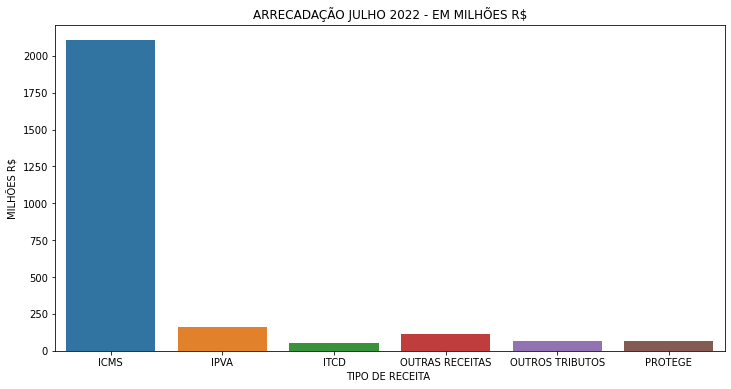

In [7]:
fig, ax = plt.subplots(figsize=(12, 6))
sb.barplot(data=arrec, x="TIPO_RECEITA", y="VALR_MILHOES", ax = ax)
#plt.bar(arrec, values, color ='maroon',        width = 0.4)
plt.title("ARRECADAÇÃO JULHO 2022 - EM MILHÕES R$")
plt.xlabel("TIPO DE RECEITA ")
plt.ylabel("MILHÕES R$")

In [6]:
arrec.loc['Total_Arrecadado']= arrec.sum(numeric_only=True, axis=0)
arrec

,ANO_MES,TIPO_RECEITA,VALR_TOTAL,VALR_MILHOES
0,202207,ICMS,2.106137e+09,210.61
1,202207,IPVA,1.607148e+08,16.07
2,202207,ITCD,5.251662e+07,5.25
3,202207,OUTRAS RECEITAS,1.165758e+08,11.66
4,202207,OUTROS TRIBUTOS,6.438255e+07,6.44
5,202207,PROTEGE,6.310529e+07,6.31
Total_Arrecadado,NaN,NaN,2.563432e+09,256.34
